# Task 2.2 – Multiple Linear Regression

The linear regression concept can be extended to the cases where there are more than two variables. This is called multiple linear regression. For instance, consider a scenario where you have to predict the price of house based upon its area, number of bedrooms, average income of the people in the area, the age of the house, and so on. In this case the dependent variable is dependent upon several independent variables. A regression model involving multiple variables can be represented as:

```y = b0 + m1b1 + m2b2 + m3b3 + ... + mnbn```
    
This is the equation of a hyper plane. Remember, a linear regression model in two dimensions is a straight line; in three dimensions it is a plane, and in more than three dimensions, a hyper plane.

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline

### Task 2.2-1:  Multiple Linear Regression

Using this dataframe, 
```
./data/2_2_petrol_consumption.csv
```
Do the following:

1.  What would be a suitable target which can be predicted using this dataset?
*  Check if there could be a linear relation between one of the independent variables (features) and the dependent variable (target) by a suitable visualization technique.
*  Apply a linear regression using only one of the features. Calculate some metrics.
* Apply a multiple linear regression using all available features. Calculate also some metrics.

In [2]:
df = pd.read_csv('./data/2_2_petrol_consumption.csv', index_col=0)

In [3]:
df.head()

,petrol tax (cent per gallon),average income (dollars),paved highways (miles),drivers license (%),petrol consumption (million gallons)
1,9.0,3571,1976,0.525,541
2,9.0,4092,1250,0.572,524
3,9.0,3865,1586,0.580,561
4,7.5,4870,2351,0.529,414
5,8.0,4399,431,0.544,410


### Visualization

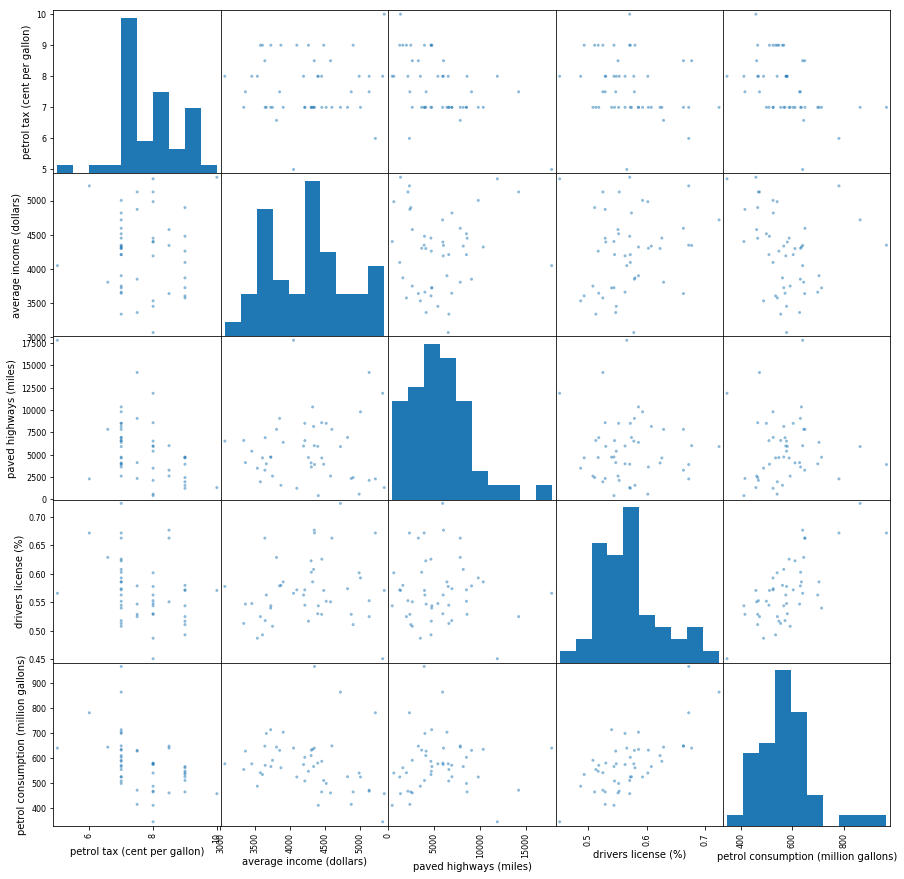

In [4]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(15,15))
plt.show()

### Linear Regression

In [5]:
X = df.iloc[:, [1]]
y = df.iloc[:, -1]

In [6]:
X.head()

,average income (dollars)
1,3571
2,4092
3,3865
4,4870
5,4399


In [7]:
y.head()

1    541
2    524
3    561
4    414
5    410
Name: petrol consumption (million gallons), dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print(regressor.intercept_)

855.6518340838581


In [11]:
print(regressor.coef_)

[-0.06292449]


In [12]:
y_pred = regressor.predict(X_test)
y_pred

array([629.0607386 , 578.84699402, 638.68818586, 626.60668341,
       662.91411526, 610.43508898, 633.65422651, 575.70076943,
       533.10088838, 579.35038996])

In [13]:
from sklearn import metrics 
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 78.53855836756176
Mean Squared Error: 8658.389890584027
Root Mean Squared Error: 93.05046958819727


### Multiple Linear Regression

In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [15]:
X.head()

,petrol tax (cent per gallon),average income (dollars),paved highways (miles),drivers license (%)
1,9.0,3571,1976,0.525
2,9.0,4092,1250,0.572
3,9.0,3865,1586,0.580
4,7.5,4870,2351,0.529
5,8.0,4399,431,0.544


In [16]:
y.head()

1    541
2    524
3    561
4    414
5    410
Name: petrol consumption (million gallons), dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print(regressor.intercept_)

425.5993322032417


In [20]:
print(regressor.coef_)

[-4.00166602e+01 -6.54126674e-02 -4.74073380e-03  1.34186212e+03]


In [21]:
y_pred = regressor.predict(X_test)
y_pred

array([469.39198872, 545.64546431, 589.66839402, 569.7304133 ,
       649.77480909, 646.63116356, 511.60814841, 672.47517717,
       502.07478157, 501.2707342 ])

In [22]:
from sklearn import metrics 
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 56.822247478964684
Mean Squared Error: 4666.3447875883585
Root Mean Squared Error: 68.31064915215165
